In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Function to load JSON summary and return dataframe
def load_experiment_summary(path, drop_losses=True):
    with open(path, "r") as f:
        data = json.load(f)

    df = pd.DataFrame(data)
    if drop_losses:
        df = df.drop(columns=["train_losses", "val_losses", "model_path"])
    return df

# Function to plot all loss curves in a grid layout (3 per row)
def plot_loss_curves_from_json_grid(path, columns=3):
    with open(path, "r") as f:
        experiments = json.load(f)

    total = len(experiments)
    rows = math.ceil(total / columns)

    fig, axes = plt.subplots(rows, columns, figsize=(6 * columns, 4 * rows))

    for i, exp in enumerate(experiments):
        row, col = divmod(i, columns)
        ax = axes[row][col] if rows > 1 else axes[col]

        name = exp["model_name"]
        train_losses = exp["train_losses"]
        val_losses = exp["val_losses"]

        ax.plot(train_losses, label="Train")
        ax.plot(val_losses, label="Val")
        ax.set_title(name)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()
        ax.grid(True)

    # Hide any empty subplots
    for j in range(total, rows * columns):
        row, col = divmod(j, columns)
        ax = axes[row][col] if rows > 1 else axes[col]
        ax.axis("off")

    plt.tight_layout()
    plt.show()

### TinyUNet

In [2]:
df_summary = load_experiment_summary("outputs/TinyUNet/gridsearch_results.json")

df_summary[df_summary["num_epochs"]==40].sort_values(by='IoU', ascending=False)

model_name  learning_rate  \
83                 TinyUNet_lr0.001_bs4_ep40_FocalLoss        0.00100   
79   TinyUNet_lr0.001_bs4_ep40_BCEJaccardWithLogits...        0.00100   
82                 TinyUNet_lr0.001_bs4_ep40_MixedLoss        0.00100   
80     TinyUNet_lr0.001_bs4_ep40_BCEDiceWithLogitsLoss        0.00100   
78         TinyUNet_lr0.001_bs4_ep40_BCEWithLogitsLoss        0.00100   
97   TinyUNet_lr0.001_bs8_ep40_BCEJaccardWithLogits...        0.00100   
98     TinyUNet_lr0.001_bs8_ep40_BCEDiceWithLogitsLoss        0.00100   
101                TinyUNet_lr0.001_bs8_ep40_FocalLoss        0.00100   
96         TinyUNet_lr0.001_bs8_ep40_BCEWithLogitsLoss        0.00100   
100                TinyUNet_lr0.001_bs8_ep40_MixedLoss        0.00100   
46                TinyUNet_lr0.0001_bs4_ep40_MixedLoss        0.00010   
43   TinyUNet_lr0.0001_bs4_ep40_BCEJaccardWithLogit...        0.00010   
47                TinyUNet_lr0.0001_bs4_ep40_FocalLoss        0.00010   
81       TinyUNet_lr0.001_bs4_ep40_FocalWithLogitsLoss        0.00100   
44    TinyUNet_lr0.0001_bs4_ep40_BCEDiceWithLogitsLoss        0.00010   
42        TinyUNet_lr0.0001_bs4_ep40_BCEWithLogitsLoss        0.00010   
99       TinyUNet_lr0.001_bs8_ep40_FocalWithLogitsLoss        0.00100   
61   TinyUNet_lr0.0001_bs8_ep40_BCEJaccardWithLogit...        0.00010   
62    TinyUNet_lr0.0001_bs8_ep40_BCEDiceWithLogitsLoss        0.00010   
64                TinyUNet_lr0.0001_bs8_ep40_MixedLoss        0.00010   
65                TinyUNet_lr0.0001_bs8_ep40_FocalLoss        0.00010   
60        TinyUNet_lr0.0001_bs8_ep40_BCEWithLogitsLoss        0.00010   
45      TinyUNet_lr0.0001_bs4_ep40_FocalWithLogitsLoss        0.00010   
10                 TinyUNet_lr1e-05_bs4_ep40_MixedLoss        0.00001   
8      TinyUNet_lr1e-05_bs4_ep40_BCEDiceWithLogitsLoss        0.00001   
7    TinyUNet_lr1e-05_bs4_ep40_BCEJaccardWithLogits...        0.00001   
28                 TinyUNet_lr1e-05_bs8_ep40_MixedLoss        0.00001   
25   TinyUNet_lr1e-05_bs8_ep40_BCEJaccardWithLogits...        0.00001   
26     TinyUNet_lr1e-05_bs8_ep40_BCEDiceWithLogitsLoss        0.00001   
6          TinyUNet_lr1e-05_bs4_ep40_BCEWithLogitsLoss        0.00001   
9        TinyUNet_lr1e-05_bs4_ep40_FocalWithLogitsLoss        0.00001   
29                 TinyUNet_lr1e-05_bs8_ep40_FocalLoss        0.00001   
24         TinyUNet_lr1e-05_bs8_ep40_BCEWithLogitsLoss        0.00001   
11                 TinyUNet_lr1e-05_bs4_ep40_FocalLoss        0.00001   
27       TinyUNet_lr1e-05_bs8_ep40_FocalWithLogitsLoss        0.00001   
63      TinyUNet_lr0.0001_bs8_ep40_FocalWithLogitsLoss        0.00010   

     batch_size  num_epochs             loss_function       IoU      Dice  \
83            4          40                 FocalLoss  0.822582  0.902645   
79            4          40  BCEJaccardWithLogitsLoss  0.819633  0.900870   
82            4          40                 MixedLoss  0.814431  0.897714   
80            4          40     BCEDiceWithLogitsLoss  0.805135  0.892005   
78            4          40         BCEWithLogitsLoss  0.804818  0.891839   
97            8          40  BCEJaccardWithLogitsLoss  0.789245  0.882182   
98            8          40     BCEDiceWithLogitsLoss  0.786741  0.880640   
101           8          40                 FocalLoss  0.785484  0.879855   
96            8          40         BCEWithLogitsLoss  0.778619  0.875526   
100           8          40                 MixedLoss  0.762572  0.865291   
46            4          40                 MixedLoss  0.731593  0.844892   
43            4          40  BCEJaccardWithLogitsLoss  0.721855  0.838350   
47            4          40                 FocalLoss  0.710282  0.830555   
81            4          40       FocalWithLogitsLoss  0.701984  0.824855   
44            4          40     BCEDiceWithLogitsLoss  0.691049  0.817148   
42            4          40         BCEWithLogitsLoss  0.690848  0.817148   
99            8          40      

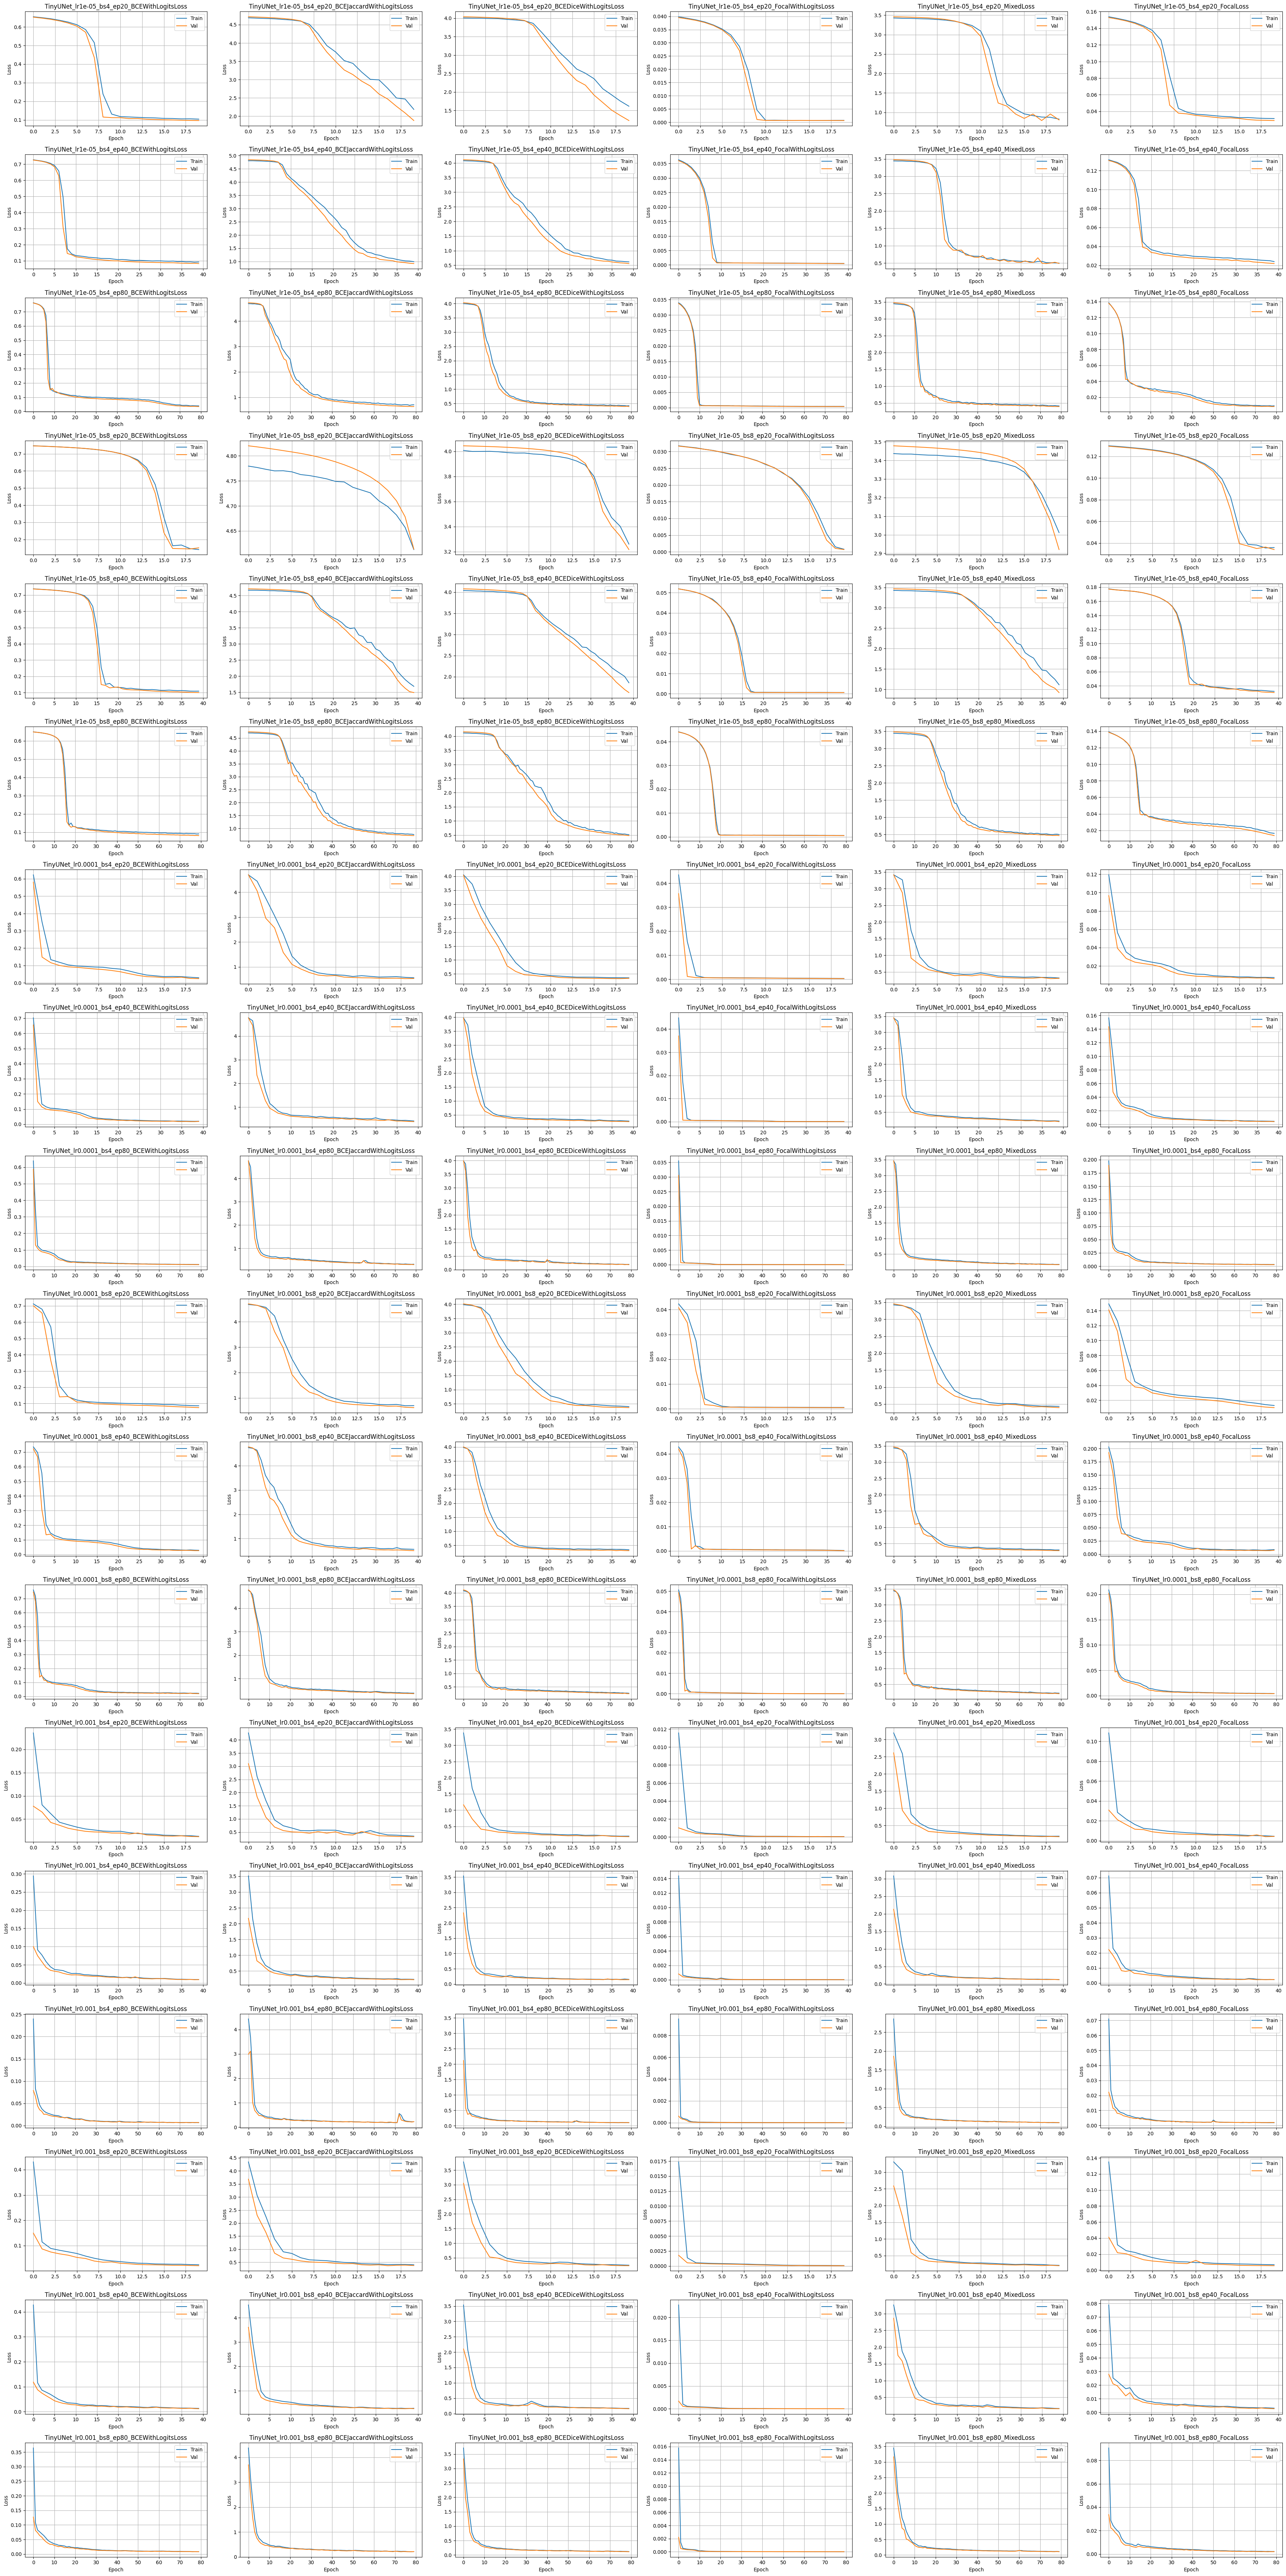

In [3]:
plot_loss_curves_from_json_grid("outputs/TinyUNet/gridsearch_results.json", columns=6)

### UNet

In [4]:
df_summary = load_experiment_summary("outputs/UNet/gridsearch_results.json")

df_summary.sort_values(by='IoU', ascending=False)

model_name  learning_rate  batch_size  \
9    UNet-5_lr0.001_bs4_ep40_BCEWithLogitsLoss        0.00100           4   
11   UNet-5_lr0.001_bs8_ep40_BCEWithLogitsLoss        0.00100           8   
5   UNet-5_lr0.0001_bs4_ep40_BCEWithLogitsLoss        0.00010           4   
7   UNet-5_lr0.0001_bs8_ep40_BCEWithLogitsLoss        0.00010           8   
10   UNet-5_lr0.001_bs8_ep20_BCEWithLogitsLoss        0.00100           8   
4   UNet-5_lr0.0001_bs4_ep20_BCEWithLogitsLoss        0.00010           4   
8    UNet-5_lr0.001_bs4_ep20_BCEWithLogitsLoss        0.00100           4   
0    UNet-5_lr1e-05_bs4_ep20_BCEWithLogitsLoss        0.00001           4   
3    UNet-5_lr1e-05_bs8_ep40_BCEWithLogitsLoss        0.00001           8   
2    UNet-5_lr1e-05_bs8_ep20_BCEWithLogitsLoss        0.00001           8   
1    UNet-5_lr1e-05_bs4_ep40_BCEWithLogitsLoss        0.00001           4   
6   UNet-5_lr0.0001_bs8_ep20_BCEWithLogitsLoss        0.00010           8   

    num_epochs      loss_function       IoU      Dice  Precision    Recall  \
9           40  BCEWithLogitsLoss  0.785095  0.879550   0.886647  0.872973   
11          40  BCEWithLogitsLoss  0.741010  0.851241   0.866490  0.836585   
5           40  BCEWithLogitsLoss  0.738487  0.849554   0.884355  0.817617   
7           40  BCEWithLogitsLoss  0.649013  0.787153   0.821315  0.755730   
10          20  BCEWithLogitsLoss  0.647313  0.785898   0.800404  0.772012   
4           20  BCEWithLogitsLoss  0.645030  0.784182   0.810198  0.760218   
8           20  BCEWithLogitsLoss  0.605570  0.754209   0.834578  0.688461   
0           20  BCEWithLogitsLoss  0.000000  0.000000   0.000000  0.000000   
3           40  BCEWithLogitsLoss  0.000000  0.000000   0.000000  0.000000   
2           20  BCEWithLogitsLoss  0.000000  0.000000   0.000000  0.000000   
1           40  BCEWithLogitsLoss  0.000000  0.000000   0.000000  0.000000   
6           20  BCEWithLogitsLoss  0.000000  0.000000   0.000000  0.000000   

    F1 Score  Pixel Accuracy       MAE  
9   0.879550        0.995790  0.004210  
11  0.851241        0.994927  0.005073  
5   0.849554        0.994913  0.005087  
7   0.787153        0.992906  0.007094  
10  0.785898        0.992693  0.007307  
4   0.784182        0.992653  0.007347  
8   0.754209        0.992103  0.007897  
0   0.000000        0.982501  0.017499  
3   0.000000        0.982646  0.017354  
2   0.000000        0.982646  0.017354  
1   0.000000        0.982501  0.017499  
6   0.000000        0.982646  0.017354

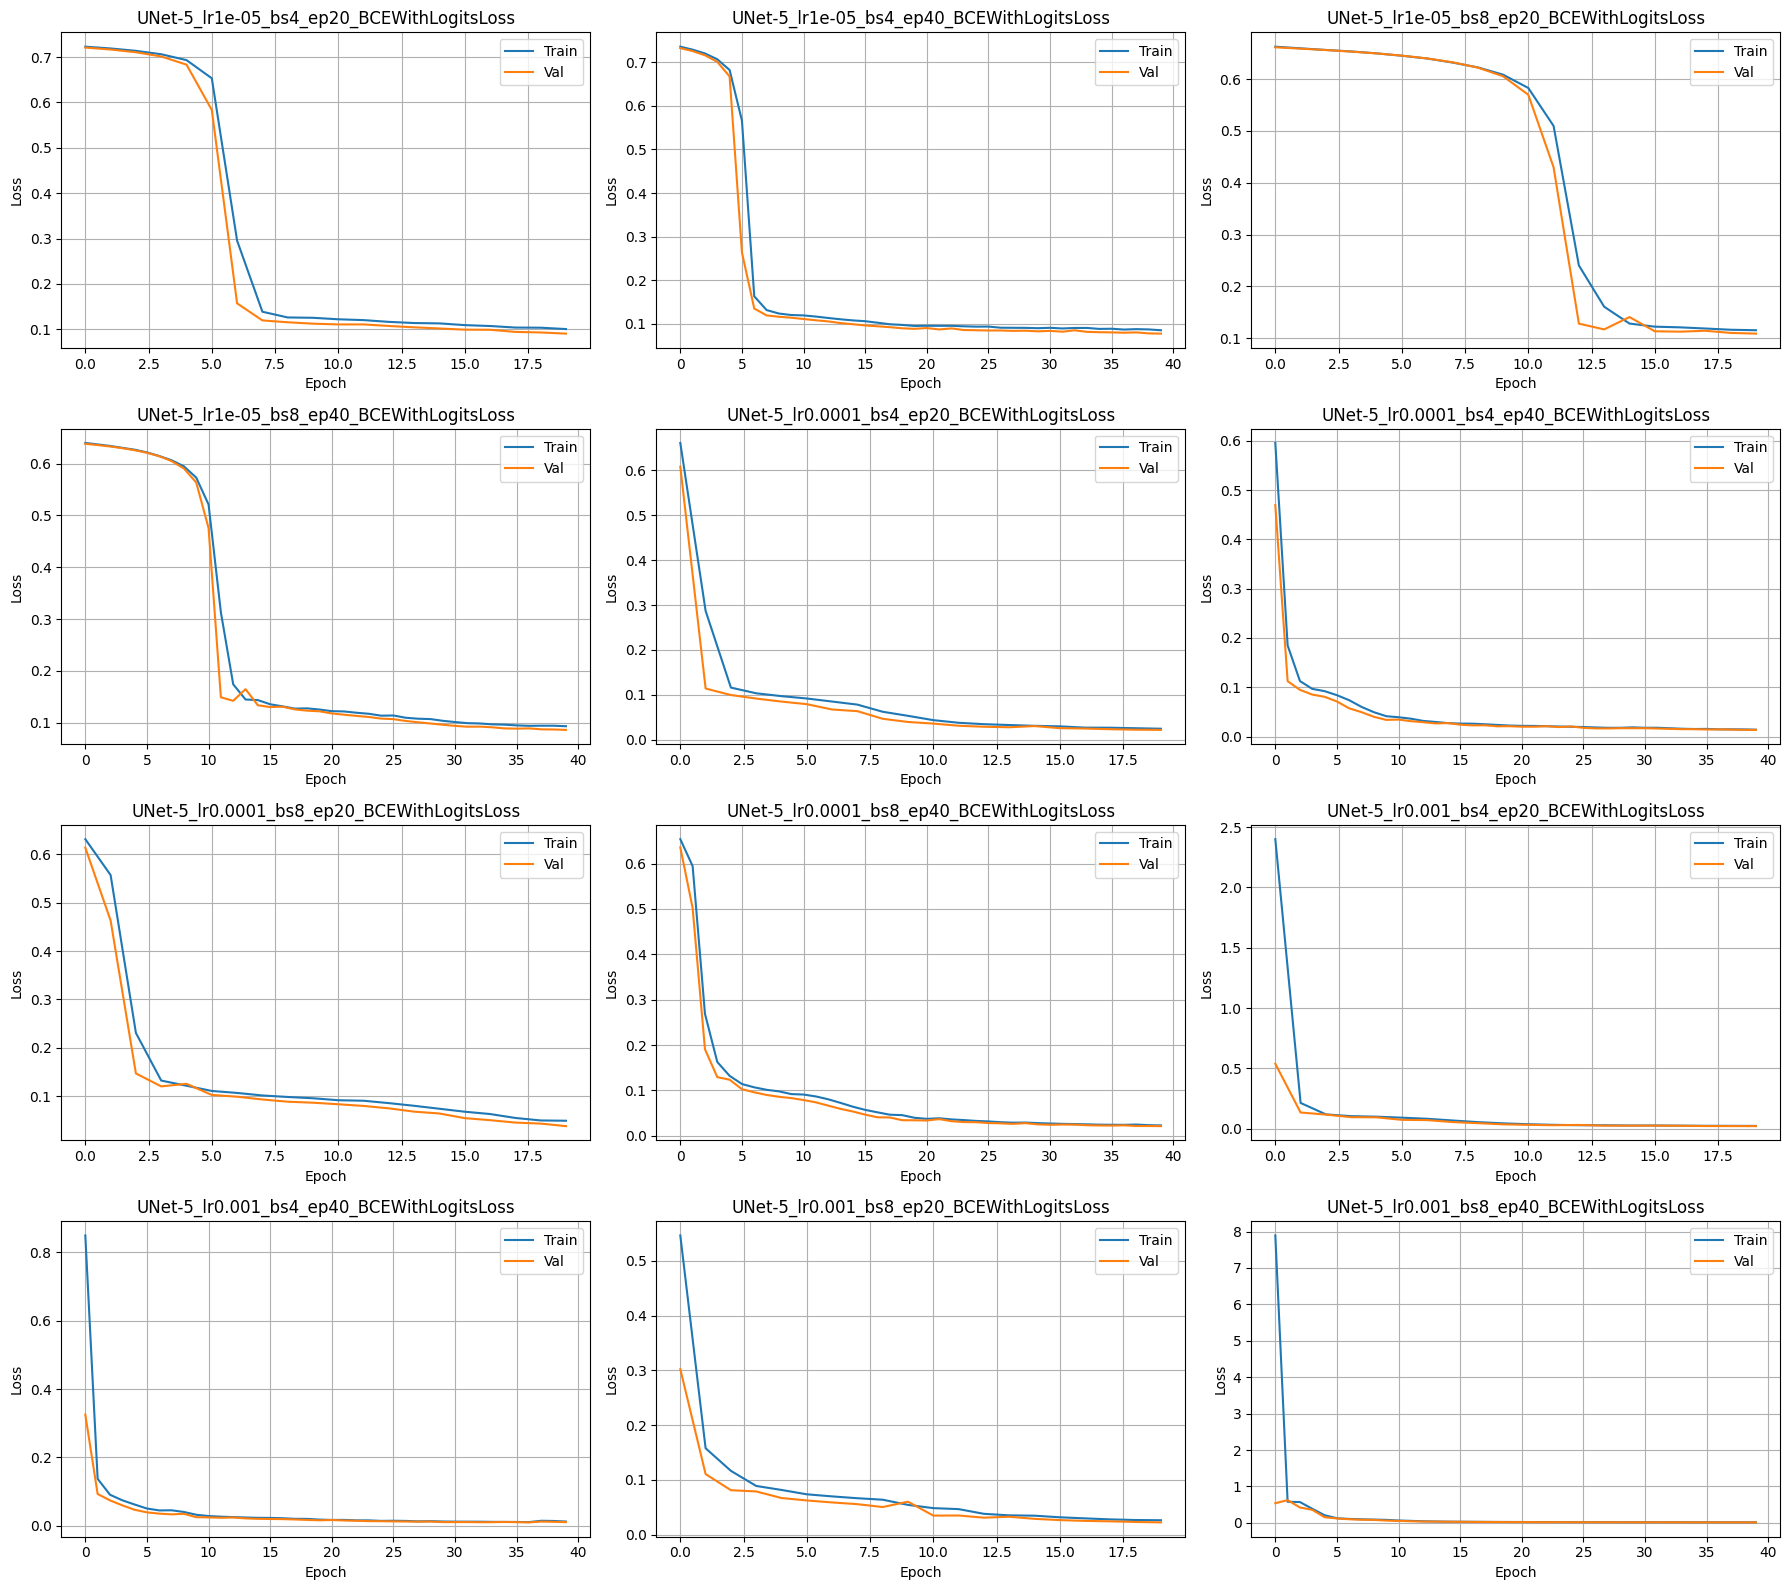

In [5]:
plot_loss_curves_from_json_grid("outputs/UNet/gridsearch_results.json", columns=3)

### UNet without transformation

In [6]:
df_summary = load_experiment_summary("outputs/UNet-without-transformation/gridsearch_results.json")

df_summary.sort_values(by='IoU', ascending=False)

model_name  learning_rate  batch_size  \
0  UNet_lr0.0001_bs4_ep40_BCEWithLogitsLoss         0.0001           4   

   num_epochs      loss_function       IoU      Dice  Precision    Recall  \
0          40  BCEWithLogitsLoss  0.714494  0.833332   0.822405  0.844723   

   F1 Score  Pixel Accuracy       MAE  
0  0.833332        0.994037  0.005963

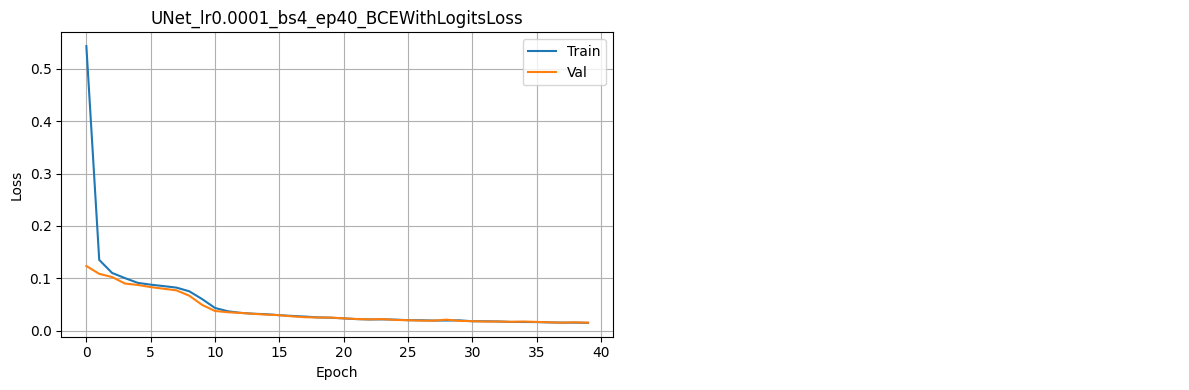

In [7]:
plot_loss_curves_from_json_grid("outputs/UNet-without-transformation/gridsearch_results.json", columns=2)

### UNet++

In [8]:
df_summary = load_experiment_summary("outputs/UNetpp/gridsearch_results.json")

df_summary.sort_values(by='IoU', ascending=False)

model_name  learning_rate  batch_size  \
9    UNetpp_lr0.001_bs2_ep40_BCEWithLogitsLoss        0.00100           2   
11   UNetpp_lr0.001_bs4_ep40_BCEWithLogitsLoss        0.00100           4   
8    UNetpp_lr0.001_bs2_ep20_BCEWithLogitsLoss        0.00100           2   
5   UNetpp_lr0.0001_bs2_ep40_BCEWithLogitsLoss        0.00010           2   
10   UNetpp_lr0.001_bs4_ep20_BCEWithLogitsLoss        0.00100           4   
7   UNetpp_lr0.0001_bs4_ep40_BCEWithLogitsLoss        0.00010           4   
4   UNetpp_lr0.0001_bs2_ep20_BCEWithLogitsLoss        0.00010           2   
6   UNetpp_lr0.0001_bs4_ep20_BCEWithLogitsLoss        0.00010           4   
1    UNetpp_lr1e-05_bs2_ep40_BCEWithLogitsLoss        0.00001           2   
3    UNetpp_lr1e-05_bs4_ep40_BCEWithLogitsLoss        0.00001           4   
0    UNetpp_lr1e-05_bs2_ep20_BCEWithLogitsLoss        0.00001           2   
2    UNetpp_lr1e-05_bs4_ep20_BCEWithLogitsLoss        0.00001           4   

    num_epochs      loss_function       IoU      Dice  Precision    Recall  \
9           40  BCEWithLogitsLoss  0.870274  0.930521   0.935110  0.926989   
11          40  BCEWithLogitsLoss  0.867597  0.929094   0.924187  0.934229   
8           20  BCEWithLogitsLoss  0.851917  0.919893   0.912841  0.928439   
5           40  BCEWithLogitsLoss  0.848572  0.918069   0.946309  0.892281   
10          20  BCEWithLogitsLoss  0.832458  0.908566   0.894644  0.923190   
7           40  BCEWithLogitsLoss  0.816315  0.898863   0.926981  0.872880   
4           20  BCEWithLogitsLoss  0.788569  0.881578   0.882085  0.882780   
6           20  BCEWithLogitsLoss  0.771565  0.871001   0.902675  0.841831   
1           40  BCEWithLogitsLoss  0.694037  0.818760   0.808534  0.831031   
3           40  BCEWithLogitsLoss  0.665180  0.798811   0.796372  0.801778   
0           20  BCEWithLogitsLoss  0.658705  0.793510   0.776765  0.812999   
2           20  BCEWithLogitsLoss  0.567738  0.722696   0.643687  0.828880   

    F1 Score  Pixel Accuracy       MAE  
9   0.930521        0.997580  0.002420  
11  0.929094        0.997495  0.002505  
8   0.919893        0.997212  0.002788  
5   0.918069        0.997211  0.002789  
10  0.908566        0.996744  0.003256  
7   0.898863        0.996554  0.003446  
4   0.881578        0.995863  0.004137  
6   0.871001        0.995616  0.004384  
1   0.818760        0.993619  0.006381  
3   0.798811        0.992884  0.007116  
0   0.793510        0.992657  0.007343  
2   0.722696        0.988447  0.011553

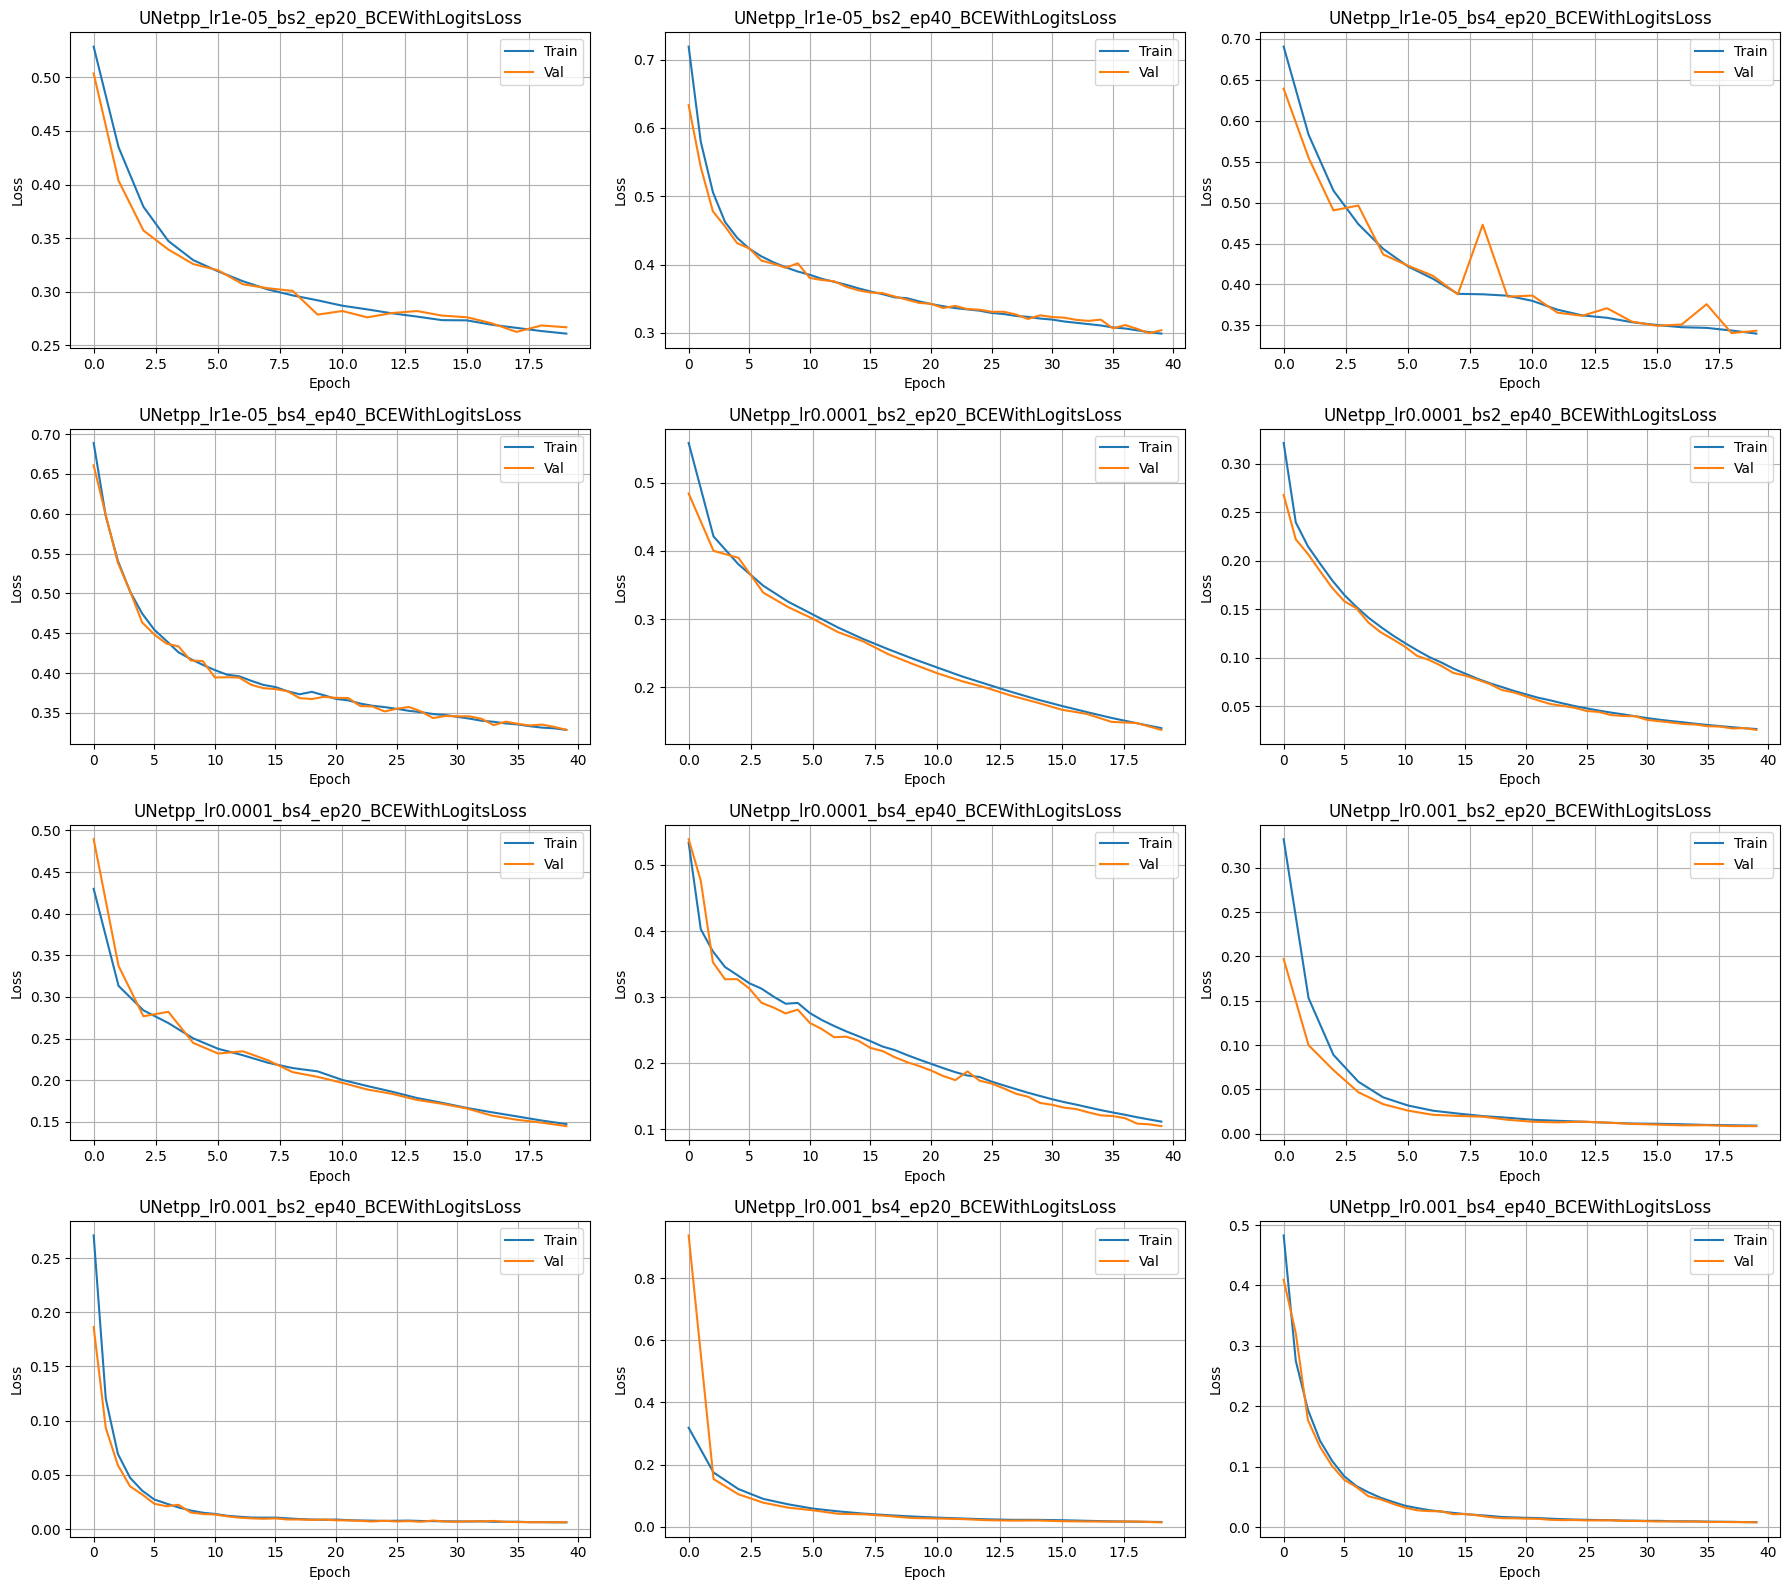

In [9]:
plot_loss_curves_from_json_grid("outputs/UNetpp/gridsearch_results.json", columns=3)

### ResUNet

In [10]:
df_summary = load_experiment_summary("outputs/ResUNet/gridsearch_results.json")

df_summary.sort_values(by='IoU', ascending=False)

model_name  learning_rate  batch_size  \
11   ResUNet-5_lr0.001_bs8_ep40_BCEWithLogitsLoss        0.00100           8   
9    ResUNet-5_lr0.001_bs4_ep40_BCEWithLogitsLoss        0.00100           4   
8    ResUNet-5_lr0.001_bs4_ep20_BCEWithLogitsLoss        0.00100           4   
10   ResUNet-5_lr0.001_bs8_ep20_BCEWithLogitsLoss        0.00100           8   
5   ResUNet-5_lr0.0001_bs4_ep40_BCEWithLogitsLoss        0.00010           4   
7   ResUNet-5_lr0.0001_bs8_ep40_BCEWithLogitsLoss        0.00010           8   
4   ResUNet-5_lr0.0001_bs4_ep20_BCEWithLogitsLoss        0.00010           4   
6   ResUNet-5_lr0.0001_bs8_ep20_BCEWithLogitsLoss        0.00010           8   
1    ResUNet-5_lr1e-05_bs4_ep40_BCEWithLogitsLoss        0.00001           4   
3    ResUNet-5_lr1e-05_bs8_ep40_BCEWithLogitsLoss        0.00001           8   
0    ResUNet-5_lr1e-05_bs4_ep20_BCEWithLogitsLoss        0.00001           4   
2    ResUNet-5_lr1e-05_bs8_ep20_BCEWithLogitsLoss        0.00001           8   

    num_epochs      loss_function       IoU      Dice  Precision    Recall  \
11          40  BCEWithLogitsLoss  0.854972  0.921803   0.927469  0.916208   
9           40  BCEWithLogitsLoss  0.853219  0.920779   0.924223  0.917636   
8           20  BCEWithLogitsLoss  0.846190  0.916672   0.894159  0.940717   
10          20  BCEWithLogitsLoss  0.827480  0.905597   0.926672  0.885463   
5           40  BCEWithLogitsLoss  0.825993  0.904703   0.927843  0.883067   
7           40  BCEWithLogitsLoss  0.806737  0.893026   0.912026  0.874807   
4           20  BCEWithLogitsLoss  0.803952  0.891313   0.896539  0.886476   
6           20  BCEWithLogitsLoss  0.727768  0.842437   0.906697  0.786705   
1           40  BCEWithLogitsLoss  0.663485  0.797697   0.905060  0.713199   
3           40  BCEWithLogitsLoss  0.564229  0.721413   0.908662  0.598272   
0           20  BCEWithLogitsLoss  0.405824  0.577294   0.937787  0.417169   
2           20  BCEWithLogitsLoss  0.385618  0.555987   0.412123  0.857469   

    F1 Score  Pixel Accuracy       MAE  
11  0.921803        0.997296  0.002704  
9   0.920779        0.997226  0.002774  
8   0.916672        0.996995  0.003005  
10  0.905597        0.996796  0.003204  
5   0.904703        0.996744  0.003256  
7   0.893026        0.996367  0.003633  
4   0.891313        0.996207  0.003793  
6   0.842437        0.994894  0.005106  
1   0.797697        0.993662  0.006338  
3   0.721413        0.991981  0.008019  
0   0.577294        0.989311  0.010689  
2   0.555987        0.975948  0.024052

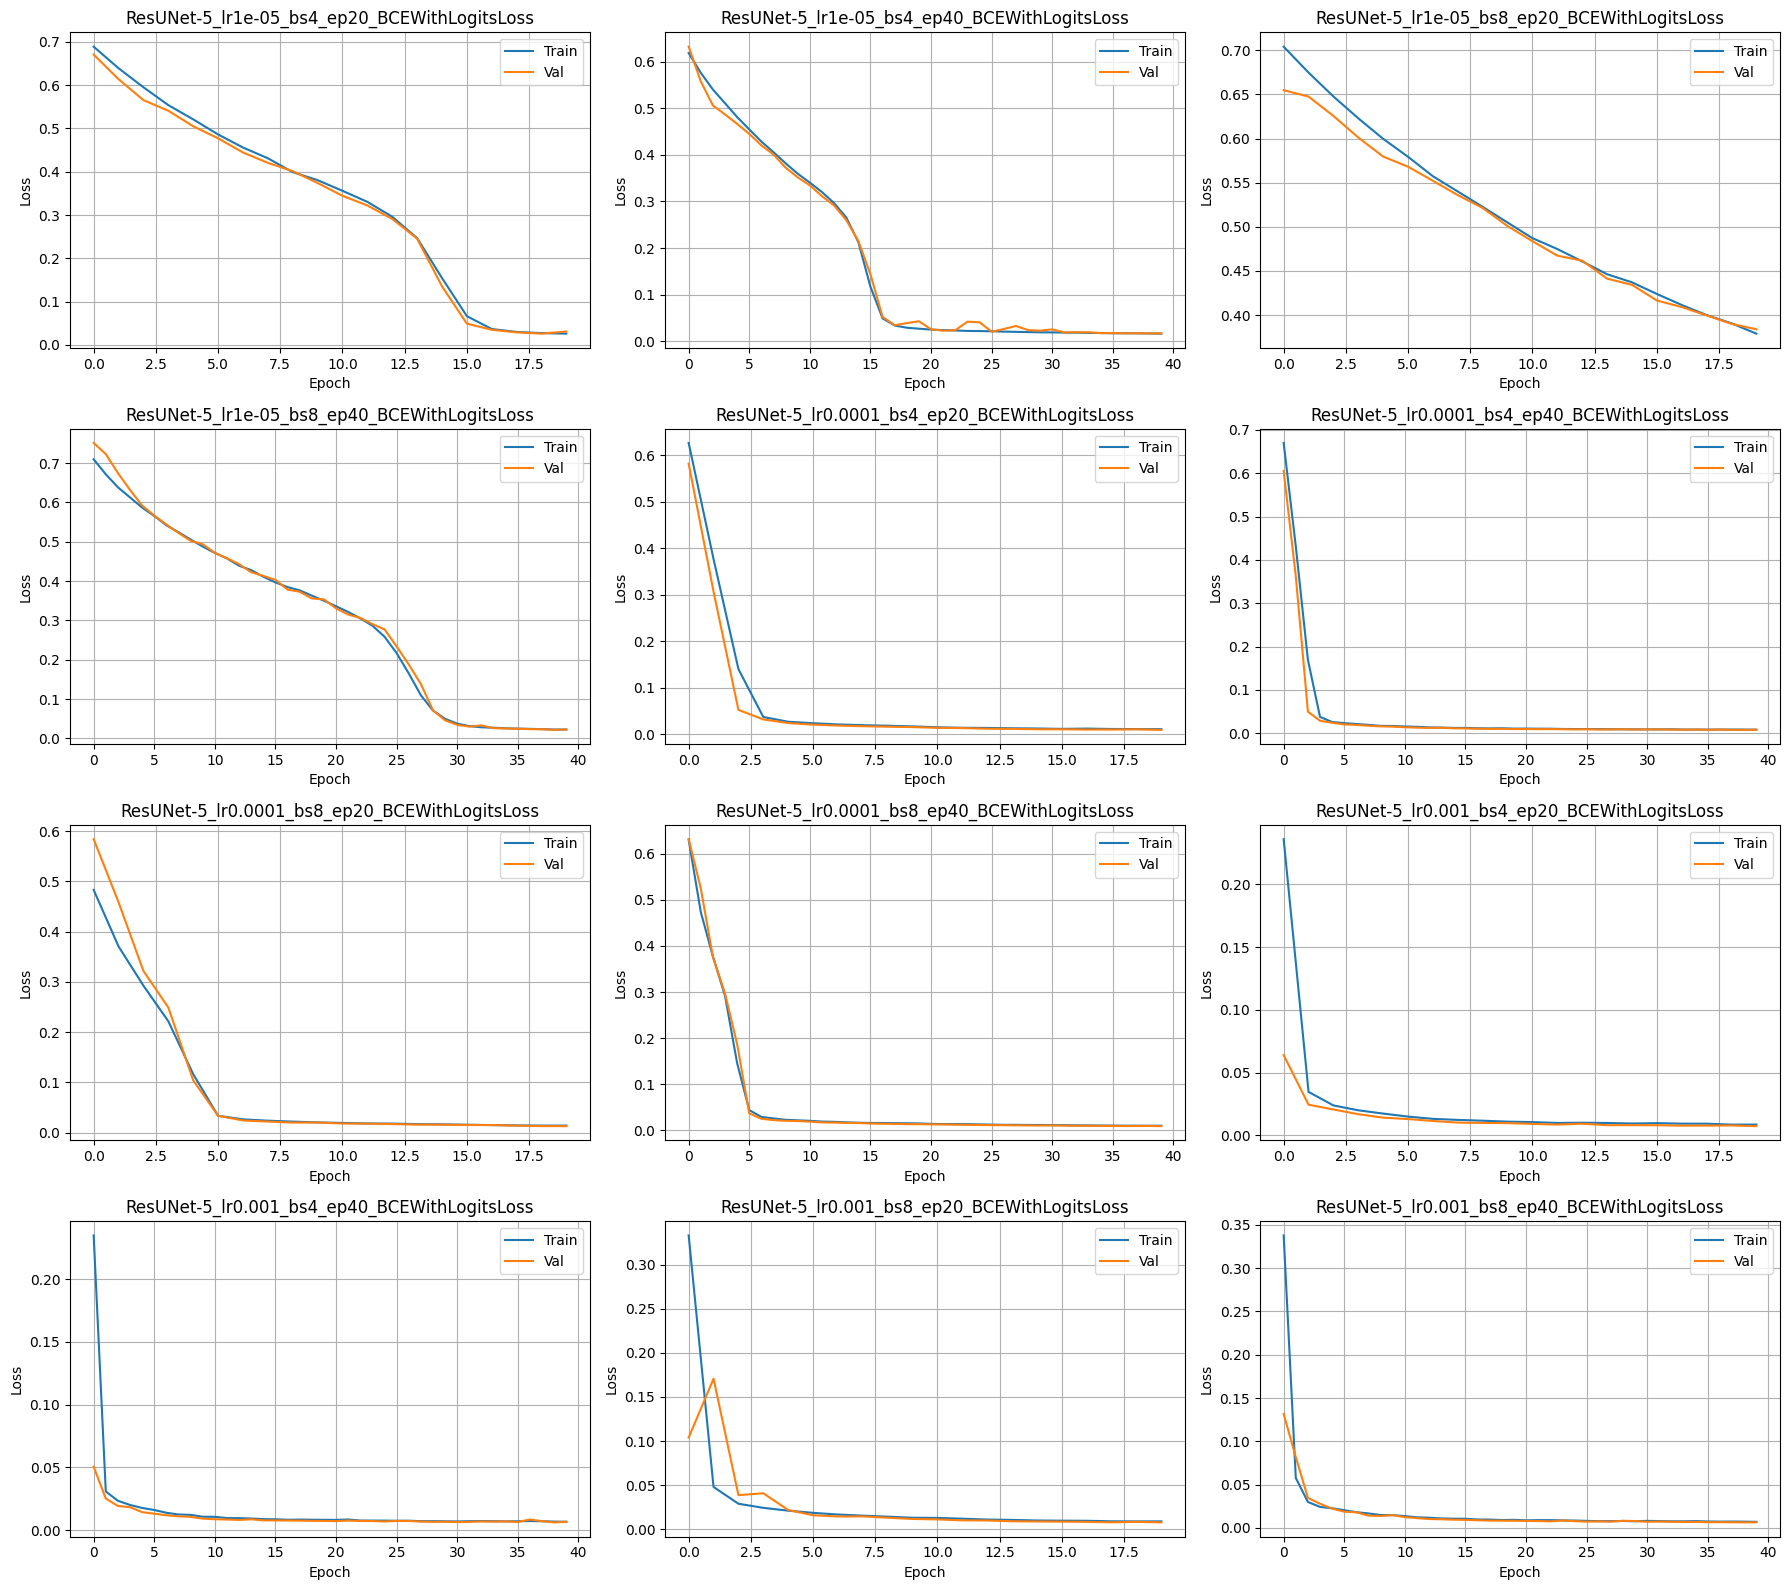

In [11]:
plot_loss_curves_from_json_grid("outputs/ResUNet/gridsearch_results.json", columns=3)

### ResUNet Deeper (custom architecture)

In [12]:
df_summary = load_experiment_summary("outputs/ResUNet_deeper/gridsearch_results.json")

df_summary.sort_values(by='IoU', ascending=False)

model_name  learning_rate  \
5  ResUNet_deeper_lr0.001_bs4_ep40_BCEWithLogitsLoss        0.00100   
4  ResUNet_deeper_lr0.001_bs4_ep20_BCEWithLogitsLoss        0.00100   
3  ResUNet_deeper_lr0.0001_bs4_ep40_BCEWithLogits...        0.00010   
2  ResUNet_deeper_lr0.0001_bs4_ep20_BCEWithLogits...        0.00010   
1  ResUNet_deeper_lr1e-05_bs4_ep40_BCEWithLogitsLoss        0.00001   
0  ResUNet_deeper_lr1e-05_bs4_ep20_BCEWithLogitsLoss        0.00001   

   batch_size  num_epochs      loss_function       IoU      Dice  Precision  \
5           4          40  BCEWithLogitsLoss  0.849725  0.918749   0.940492   
4           4          20  BCEWithLogitsLoss  0.845762  0.916429   0.929508   
3           4          40  BCEWithLogitsLoss  0.834681  0.909884   0.925062   
2           4          20  BCEWithLogitsLoss  0.808099  0.893862   0.898886   
1           4          40  BCEWithLogitsLoss  0.683455  0.811943   0.898270   
0           4          20  BCEWithLogitsLoss  0.514133  0.679085   0.855835   

     Recall  F1 Score  Pixel Accuracy       MAE  
5  0.898249  0.918749        0.997223  0.002777  
4  0.903952  0.916429        0.997104  0.002896  
3  0.895425  0.909884        0.996896  0.003104  
2  0.889147  0.893862        0.996306  0.003694  
1  0.740948  0.811943        0.993982  0.006018  
0  0.563136  0.679085        0.990683  0.009317

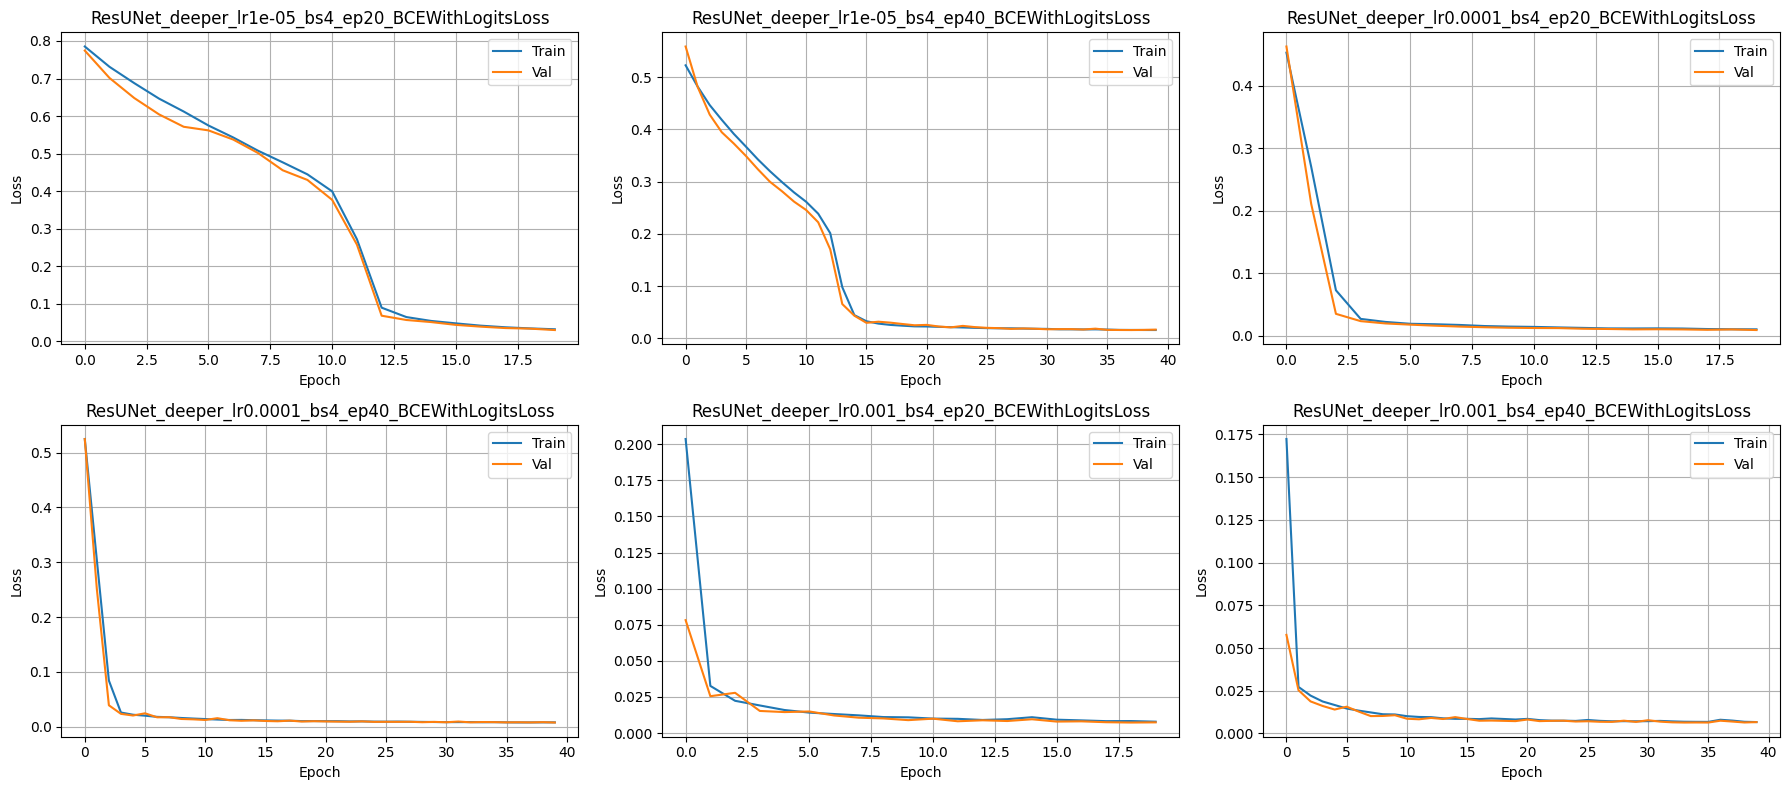

In [13]:
plot_loss_curves_from_json_grid("outputs/ResUNet_deeper/gridsearch_results.json", columns=3)

### ResUNet++ (custom architecture)

In [14]:
df_summary = load_experiment_summary("outputs/ResUNetpp/gridsearch_results.json")

df_summary.sort_values(by='IoU', ascending=False)

model_name  learning_rate  batch_size  \
9    ResUNetpp_lr0.001_bs2_ep40_BCEWithLogitsLoss        0.00100           2   
11   ResUNetpp_lr0.001_bs4_ep40_BCEWithLogitsLoss        0.00100           4   
5   ResUNetpp_lr0.0001_bs2_ep40_BCEWithLogitsLoss        0.00010           2   
10   ResUNetpp_lr0.001_bs4_ep20_BCEWithLogitsLoss        0.00100           4   
8    ResUNetpp_lr0.001_bs2_ep20_BCEWithLogitsLoss        0.00100           2   
7   ResUNetpp_lr0.0001_bs4_ep40_BCEWithLogitsLoss        0.00010           4   
4   ResUNetpp_lr0.0001_bs2_ep20_BCEWithLogitsLoss        0.00010           2   
6   ResUNetpp_lr0.0001_bs4_ep20_BCEWithLogitsLoss        0.00010           4   
1    ResUNetpp_lr1e-05_bs2_ep40_BCEWithLogitsLoss        0.00001           2   
3    ResUNetpp_lr1e-05_bs4_ep40_BCEWithLogitsLoss        0.00001           4   
0    ResUNetpp_lr1e-05_bs2_ep20_BCEWithLogitsLoss        0.00001           2   
2    ResUNetpp_lr1e-05_bs4_ep20_BCEWithLogitsLoss        0.00001           4   

    num_epochs      loss_function       IoU      Dice  Precision    Recall  \
9           40  BCEWithLogitsLoss  0.876760  0.934254   0.926245  0.943337   
11          40  BCEWithLogitsLoss  0.874854  0.933236   0.931255  0.935484   
5           40  BCEWithLogitsLoss  0.866763  0.928551   0.919201  0.939301   
10          20  BCEWithLogitsLoss  0.860163  0.924818   0.913117  0.937038   
8           20  BCEWithLogitsLoss  0.859416  0.924294   0.916093  0.933898   
7           40  BCEWithLogitsLoss  0.852992  0.920650   0.932300  0.909429   
4           20  BCEWithLogitsLoss  0.850108  0.918934   0.925416  0.913639   
6           20  BCEWithLogitsLoss  0.833115  0.908961   0.932094  0.887221   
1           40  BCEWithLogitsLoss  0.812472  0.896431   0.926608  0.869217   
3           40  BCEWithLogitsLoss  0.780731  0.876853   0.910087  0.846164   
0           20  BCEWithLogitsLoss  0.772906  0.871706   0.909186  0.838518   
2           20  BCEWithLogitsLoss  0.656828  0.792847   0.878928  0.722365   

    F1 Score  Pixel Accuracy       MAE  
9   0.934254        0.997704  0.002296  
11  0.933236        0.997645  0.002355  
5   0.928551        0.997498  0.002502  
10  0.924818        0.997331  0.002669  
8   0.924294        0.997353  0.002647  
7   0.920650        0.997264  0.002736  
4   0.918934        0.997179  0.002821  
6   0.908961        0.996889  0.003111  
1   0.896431        0.996485  0.003515  
3   0.876853        0.995830  0.004170  
0   0.871706        0.995673  0.004327  
2   0.792847        0.993385  0.006615

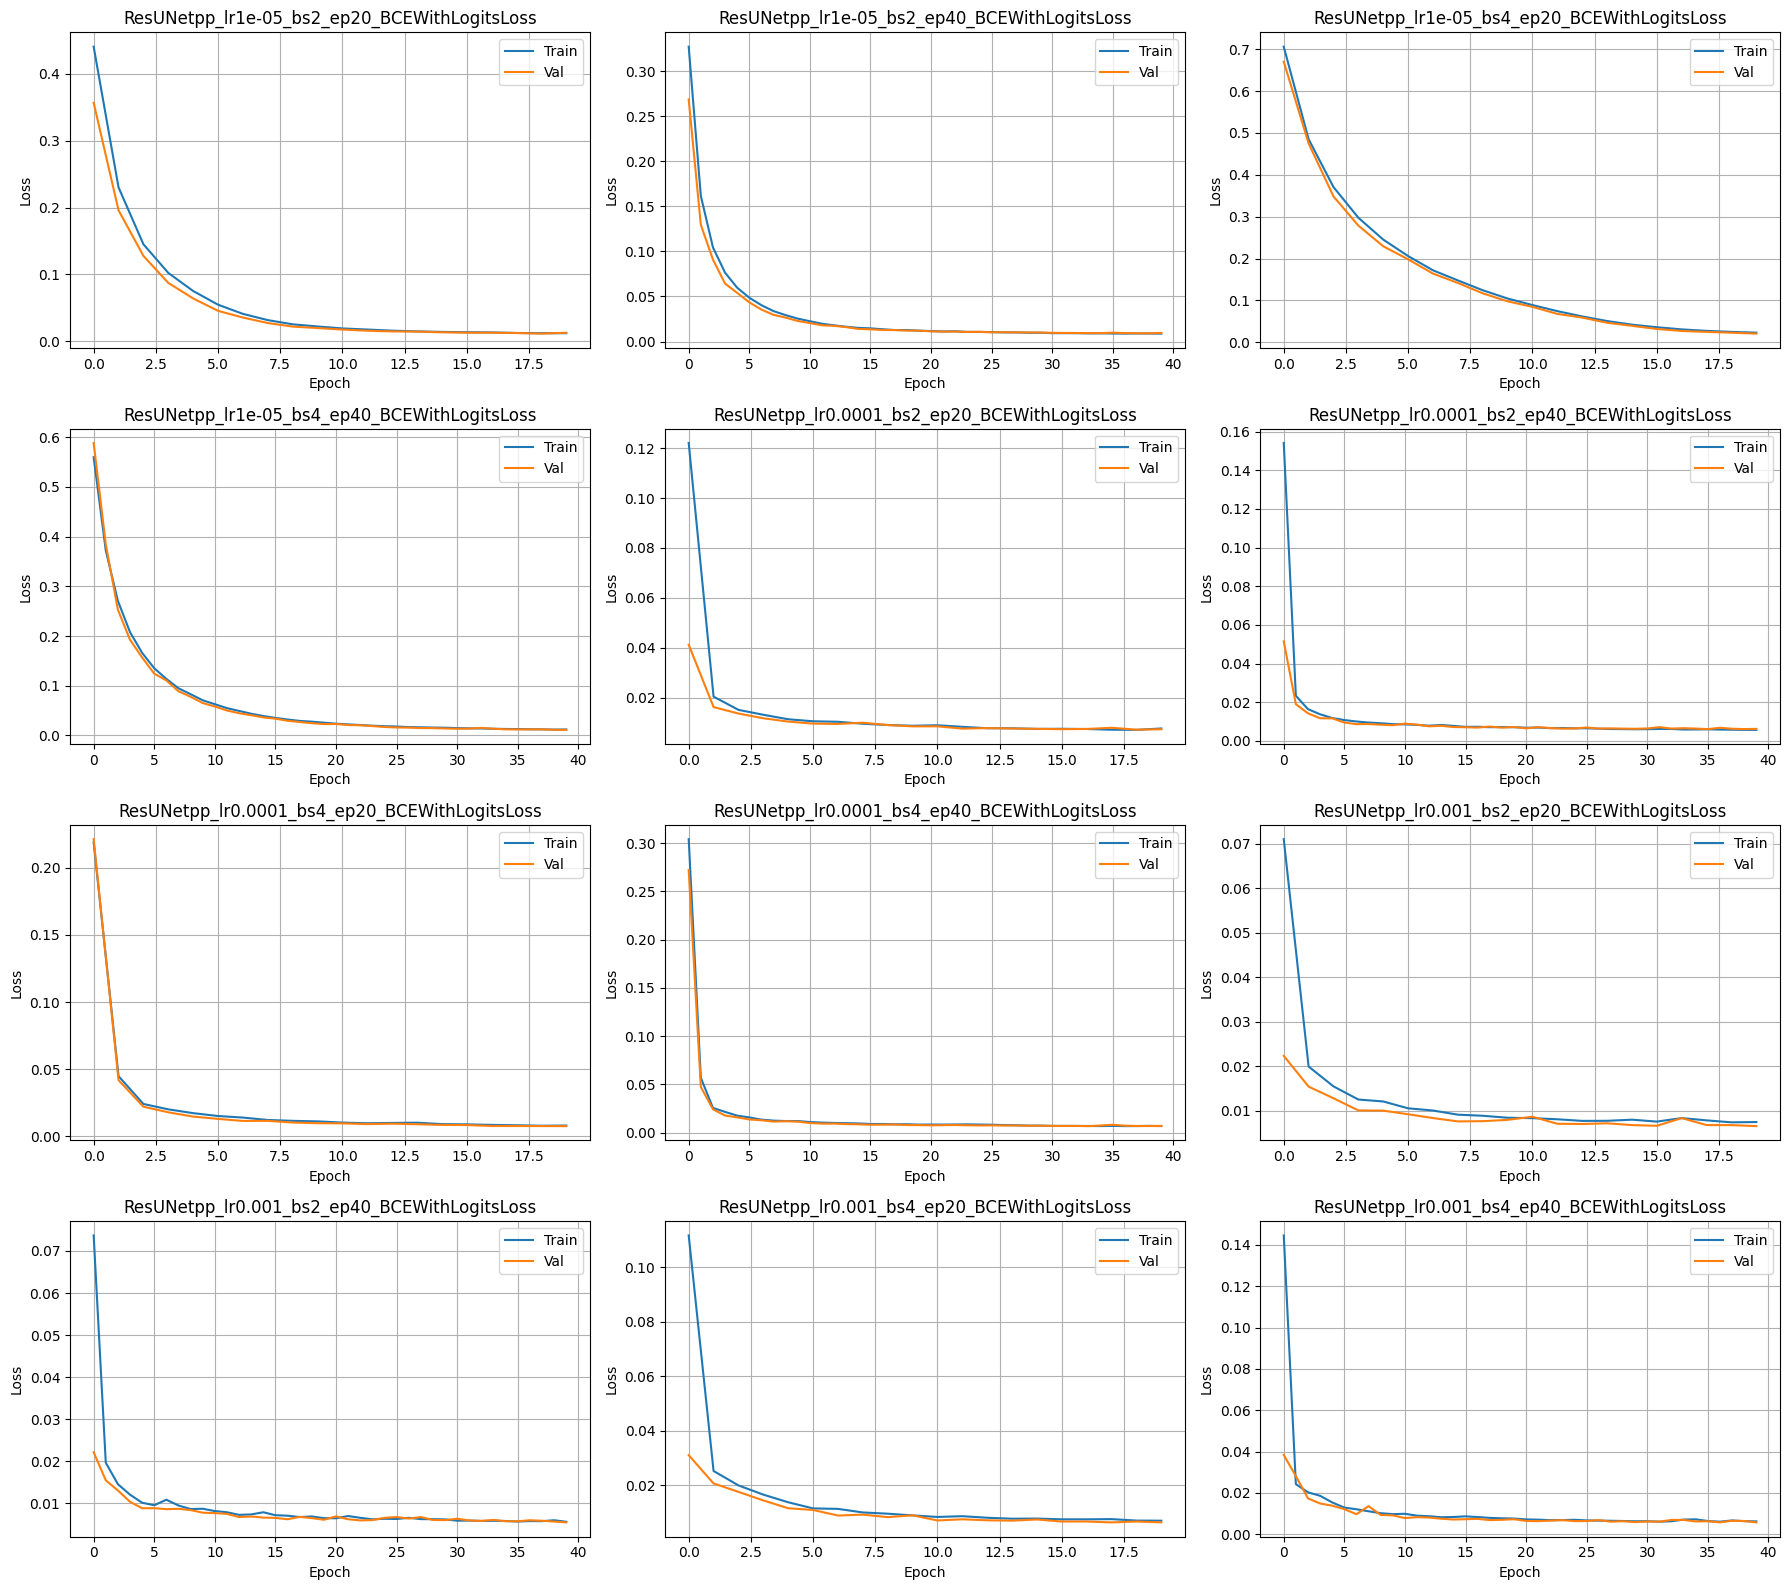

In [15]:
plot_loss_curves_from_json_grid("outputs/ResUNetpp/gridsearch_results.json", columns=3)